In [1]:
import jyrobot
from IPython.display import clear_output, display
import random

In [2]:
world = jyrobot.load("two-scribblers")

In [3]:
world.watch()
#world.watch("panel")

Canvas(height=750, image_data=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xdc\x00\x00\x02\xee\x08\x06\x0…

In [4]:
world.info()

Robots:
-------------------------
    robot[0]: 'Red'
    robot[1]: 'Blue'


In [5]:
world.reset()
world.robot[0].move(1, 0)
world.robot[1].move(1, 0)

In [6]:
def control(robot):
    if robot.name == "Red":
        pic = robot.cameras[0].takePicture()
        clear_output(wait=True)
        display(pic)
    if robot.stalled:
        robot.turn(1 - random.random() * 2)
        robot.tvx = -robot.tvx
        #return True

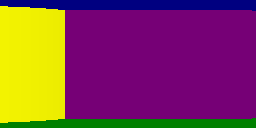

CPU times: user 10.5 s, sys: 37.4 ms, total: 10.6 s
Wall time: 10.5 s


In [7]:
%%time
world.run([control, control])